In [ ]:
import pandas as pd

data=pd.read_csv("loadmetro.csv")

#data

In [ ]:
# Specify the columns you want to keep
columns_to_keep = ['datetime','Load', 'WS50M']

# Use indexing to select the desired columns
df = data[columns_to_keep]
# set the 'datetime_column' as the index
df.set_index('datetime', inplace=True)
df

,Load,WS50M
datetime,,
2019-03-21 00:00:00,352.862799,1.75
2019-03-21 01:00:00,330.444853,1.43
2019-03-21 02:00:00,287.419792,1.37
2019-03-21 03:00:00,258.110368,1.60
2019-03-21 04:00:00,247.745866,2.04
...,...,...
2021-09-22 19:00:00,632.235500,5.19
2021-09-22 20:00:00,612.703162,4.27
2021-09-22 21:00:00,589.574385,4.07


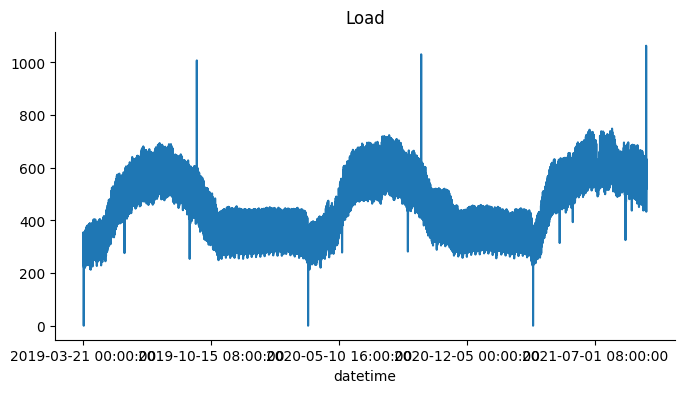

In [ ]:
# @title Load

from matplotlib import pyplot as plt
df['Load'].plot(kind='line', figsize=(8, 4), title='Load')
plt.gca().spines[['top', 'right']].set_visible(False)

In [ ]:
train_size = int(len(df) * 0.8)  # Calculate the size of the training set as 60% of the total data length
test_size = len(df) - train_size  # Calculate the size of the test set as the remaining 40% of the data

# Split the DataFrame 'df' into the training set and test set
train, test = df.iloc[0:train_size], df.iloc[train_size:len(df)]

print(len(train), len(test))  # Print the lengths of the training set and test set

test_size = int(len(test) * 0.5)  # Calculate the new size of the test set as 50% of the current test set length
val_size = len(test) - test_size  # Calculate the size of the validation set as the remaining 50% of the current test set

# Split the current test set into the validation set and a new test set
val, test = test.iloc[0:test_size], test.iloc[test_size:len(test)]
print(len(val), len(test))  # Print the lengths of the training set and test set


17606 4402
2201 2201


In [ ]:
train

,Load,WS50M
datetime,,
2019-03-21 00:00:00,352.862799,1.75
2019-03-21 01:00:00,330.444853,1.43
2019-03-21 02:00:00,287.419792,1.37
2019-03-21 03:00:00,258.110368,1.60
2019-03-21 04:00:00,247.745866,2.04
...,...,...
2021-03-23 09:00:00,255.124590,11.42
2021-03-23 10:00:00,277.647667,12.21
2021-03-23 11:00:00,296.246891,11.36


In [ ]:
val

,Load,WS50M
datetime,,
2021-03-23 14:00:00,298.892484,9.74
2021-03-23 15:00:00,298.028399,9.65
2021-03-23 16:00:00,302.942181,9.67
2021-03-23 17:00:00,310.834565,8.40
2021-03-23 18:00:00,321.126720,7.35
...,...,...
2021-06-23 02:00:00,581.069337,4.83
2021-06-23 03:00:00,562.551994,5.05
2021-06-23 04:00:00,550.519091,5.57


In [ ]:
test

,Load,WS50M
datetime,,
2021-06-23 07:00:00,551.157958,6.66
2021-06-23 08:00:00,599.464707,6.13
2021-06-23 09:00:00,644.483951,5.38
2021-06-23 10:00:00,682.184514,5.10
2021-06-23 11:00:00,713.573188,5.18
...,...,...
2021-09-22 19:00:00,632.235500,5.19
2021-09-22 20:00:00,612.703162,4.27
2021-09-22 21:00:00,589.574385,4.07


In [ ]:
"""The code performs feature scaling using MinMaxScaler from the scikit-learn library. It first fits the scaler on the training data and then applies the transformation to the training, validation, and test sets."""

from sklearn.preprocessing import MinMaxScaler  # Import the MinMaxScaler class from the sklearn.preprocessing module

f_columns = ['WS50M']  # Define a list of column names to be transformed

f_transformer = MinMaxScaler()  # Create an instance of MinMaxScaler for feature transformation
t_transformer = MinMaxScaler()  # Create an instance of MinMaxScaler for target transformation

f_transformer = f_transformer.fit(train[f_columns].to_numpy())  # Fit the feature transformer to the training data
t_transformer = t_transformer.fit(train[['Load']])  # Fit the target transformer to the training data

train.loc[:, f_columns] = f_transformer.transform(train[f_columns].to_numpy())  # Apply feature transformation to the training data
train['Load'] = t_transformer.transform(train[['Load']])  # Apply target transformation to the training data

val.loc[:, f_columns] = f_transformer.transform(val[f_columns].to_numpy())  # Apply feature transformation to the validation data
val['Load'] = t_transformer.transform(val[['Load']])  # Apply target transformation to the validation data

test.loc[:, f_columns] = f_transformer.transform(test[f_columns].to_numpy())  # Apply feature transformation to the test data
test['Load'] = t_transformer.transform(test[['Load']])  # Apply target transformation to the test data


<ipython-input-15-ef4782a400fb>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train.loc[:, f_columns] = f_transformer.transform(train[f_columns].to_numpy())  # Apply feature transformation to the training data
<ipython-input-15-ef4782a400fb>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['Load'] = t_transformer.transform(train[['Load']])  # Apply target transformation to the training data


In [ ]:
"""The code defines a function called create_dataset that takes in input features X, target variable y, and a parameter time_steps. It creates a dataset suitable for time series forecasting by splitting the input features and target variable into sequences of length time_steps."""
import numpy as np
def create_dataset(X, y, time_steps=1):
    Xs, ys = [], []  # Initialize empty lists to store the input sequences (Xs) and corresponding target values (ys)
    for i in range(len(X) - time_steps):  # Iterate over the range of indices up to the length of X minus time_steps
        v = X.iloc[i:(i + time_steps)].values  # Extract a sequence of length time_steps from X
        Xs.append(v)  # Append the sequence to Xs
        ys.append(y.iloc[i + time_steps])  # Append the corresponding target value to ys
    return np.array(Xs), np.array(ys)  # Convert Xs and ys to NumPy arrays and return them





"""The code sets the value of time_steps to 24, which represents the number of time steps or previous observations to consider for each sample in the dataset. It then uses the create_dataset function to create training, validation, and test datasets by reshaping the input features and target variables into the appropriate format."""

time_steps = 24  # Set the number of time steps to 24

X_train, y_train = create_dataset(train, train.Load, time_steps)  # Create the training dataset using the 'create_dataset' function

X_validate, y_validate = create_dataset(val, val.Load, time_steps)  # Create the validation dataset using the 'create_dataset' function

X_test, y_test = create_dataset(test, test.Load, time_steps)  # Create the test dataset using the 'create_dataset' function

In [ ]:
print(X_train.shape,y_train.shape, X_validate.shape, y_validate.shape,X_test.shape,  y_test.shape)

(17582, 24, 2) (17582,) (2177, 24, 2) (2177,) (2177, 24, 2) (2177,)


In [ ]:
!pip install keras_tuner

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 128.9/128.9 kB 1.7 MB/s eta 0:00:00


In [ ]:
import math
from tensorflow import keras
from keras import layers
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout

import keras_tuner
#from kerastuner.tuners import RandomSearch
#from kerastuner.engine.hyperparameters import HyperParameters

from keras_tuner import RandomSearch, HyperModel, HyperParameters

import tensorflow as tf

In [ ]:
def build_model(hp):
    model = keras.Sequential()

    # Determine the number of layers to include
    num_layers = hp.Int('num_layers', min_value=2, max_value=5, step=1)

    for i in range(num_layers):
        units = hp.Int(f'units_{i+1}', min_value=20, max_value=512, step=12)
        return_sequences = (i != num_layers - 1)  # Set return_sequences=True for all but the last layer

        model.add(layers.LSTM(units=units, input_shape=(X_train.shape[1], X_train.shape[2]), return_sequences=return_sequences))

        # Add dropout layer after each LSTM layer
        dropout_rate = hp.Float(f'dropout_{i+1}', min_value=0.0, max_value=0.5, step=0.1)
        model.add(layers.Dropout(dropout_rate))

    model.add(layers.Dense(1))
    model.compile(
        optimizer=tf.keras.optimizers.Adam(),
        loss='mean_squared_error',
        metrics=['mse'])
    return model

In [ ]:
tuner = RandomSearch(
    build_model,  # The function responsible for constructing the model
    objective='val_mse',  # The objective to minimize (validation mean squared error)
    max_trials=5,  # Maximum number of hyperparameter combinations to try
    executions_per_trial=1,  # Number of times to train and evaluate each model configuration
    overwrite=True  # Whether to overwrite previously saved results
)


from keras.callbacks import EarlyStopping

# Create an instance of EarlyStopping callback
custom_early_stopping = EarlyStopping(
    monitor='val_loss',  # Quantity to monitor for early stopping (validation loss)
    patience=5,  # Number of epochs with no improvement after which training will be stopped
    #min_delta=0.0001,  # Minimum change in the monitored quantity to qualify as improvement
 #   mode='auto'  # Direction of improvement ('auto' determines it automatically based on the monitored quantity)
)



tuner.search_space_summary()


Search space summary
Default search space size: 5
num_layers (Int)
{'default': None, 'conditions': [], 'min_value': 2, 'max_value': 5, 'step': 1, 'sampling': 'linear'}
units_1 (Int)
{'default': None, 'conditions': [], 'min_value': 20, 'max_value': 512, 'step': 12, 'sampling': 'linear'}
dropout_1 (Float)
{'default': 0.0, 'conditions': [], 'min_value': 0.0, 'max_value': 0.5, 'step': 0.1, 'sampling': 'linear'}
units_2 (Int)
{'default': None, 'conditions': [], 'min_value': 20, 'max_value': 512, 'step': 12, 'sampling': 'linear'}
dropout_2 (Float)
{'default': 0.0, 'conditions': [], 'min_value': 0.0, 'max_value': 0.5, 'step': 0.1, 'sampling': 'linear'}


In [ ]:
tuner.search(
        x=X_train,
        y= y_train,
        epochs=50,
        batch_size=32,
        validation_data=(X_validate, y_validate),
        callbacks=[custom_early_stopping]
)

Trial 5 Complete [01h 33m 00s]
val_mse: 0.00013585484703071415

Best val_mse So Far: 0.00013585484703071415
Total elapsed time: 05h 20m 11s


In [ ]:
tuner.results_summary()

Results summary
Results in ./untitled_project
Showing 10 best trials
Objective(name="val_mse", direction="min")

Trial 4 summary
Hyperparameters:
num_layers: 5
units_1: 164
dropout_1: 0.2
units_2: 140
dropout_2: 0.1
units_3: 68
dropout_3: 0.30000000000000004
units_4: 272
dropout_4: 0.30000000000000004
units_5: 20
dropout_5: 0.0
Score: 0.00013585484703071415

Trial 3 summary
Hyperparameters:
num_layers: 4
units_1: 104
dropout_1: 0.4
units_2: 380
dropout_2: 0.0
units_3: 176
dropout_3: 0.4
units_4: 20
dropout_4: 0.0
Score: 0.00014186451153364033

Trial 0 summary
Hyperparameters:
num_layers: 3
units_1: 104
dropout_1: 0.1
units_2: 224
dropout_2: 0.1
units_3: 20
dropout_3: 0.0
Score: 0.00017835514154285192

Trial 1 summary
Hyperparameters:
num_layers: 3
units_1: 332
dropout_1: 0.2
units_2: 440
dropout_2: 0.2
units_3: 272
dropout_3: 0.0
Score: 0.0001888711703941226

Trial 2 summary
Hyperparameters:
num_layers: 3
units_1: 260
dropout_1: 0.0
units_2: 416
dropout_2: 0.2
units_3: 92
dropout_3: 0.